In [91]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
dtype = np.float64
from printmd import  *
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

## Типовой расчет по предмету МСА. Часть 1
### Остромецкий Дмитрий Вариант 15
**Выборка 1**

In [92]:
k = 15
sample_size = 20
def Y_l(i, j):
    i+=1
    j+=1
    return  i / (i + j)

def Y_b(j):
    j+=1
    return j * (k + 1) / k

Y_linear = np.fromfunction(Y_l, (4, 4), dtype=dtype)
Y_bias = np.fromfunction(Y_b, (4,), dtype=dtype)
Y = np.matmul(sps.norm.rvs(size=(sample_size, 4)), Y_linear) + Y_bias
pd.DataFrame(Y, columns=['y(1)', 'y(2)', 'y(4)', 'y(4)'])

,y(1),y(2),y(4),y(4)
0,2.545700,3.144831,3.965829,4.881299
1,1.058471,2.116364,3.182012,4.249361
2,3.074954,3.781856,4.597693,5.479548
3,0.144693,1.319477,2.484649,3.632047
4,2.677750,3.428352,4.289612,5.209226
5,2.199170,2.939042,3.824908,4.776704
6,3.736851,4.277846,5.002494,5.824770
7,1.265428,2.325211,3.374433,4.423899
8,2.660614,3.388479,4.241173,5.158452
9,2.047672,2.895982,3.830462,4.806217


**Выборка 2**

In [93]:
def X_l(i, j):
    i+=1
    j+=1
    return  (i + 1)  / (i + j + 1)

def X_b(j):
    j+=1
    return j * (k + 3) / k

X_linear = np.fromfunction(Y_l, (4, 4), dtype=dtype)
X_bias = np.fromfunction(Y_b, (4,), dtype=dtype)
X = np.matmul(sps.norm.rvs(size=(sample_size, 4)), Y_linear) + Y_bias
pd.DataFrame(Y, columns=['x(1)', 'x(2)', 'x(4)', 'x(4)'])

,x(1),x(2),x(4),x(4)
0,2.545700,3.144831,3.965829,4.881299
1,1.058471,2.116364,3.182012,4.249361
2,3.074954,3.781856,4.597693,5.479548
3,0.144693,1.319477,2.484649,3.632047
4,2.677750,3.428352,4.289612,5.209226
5,2.199170,2.939042,3.824908,4.776704
6,3.736851,4.277846,5.002494,5.824770
7,1.265428,2.325211,3.374433,4.423899
8,2.660614,3.388479,4.241173,5.158452
9,2.047672,2.895982,3.830462,4.806217


1. **Найти векторы из оценок средних для обеих выборок**

In [94]:
Y_m = Y.mean(axis=0)
X_m = X.mean(axis=0)
Y_D = np.cov(Y.T)
l, e = np.linalg.eig(Y_D)

display(mdVector("\\hat{\\mu}_X", X_m))
display(mdVector("\\hat{\\mu}_Y", Y_m))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2. **Для элементов первой выборки найти первую и вторую главные
компоненты**

In [95]:
Y_D = np.cov(Y.T)
display(mdMatrix( "\\hat{D}_Y", Y_D))

<IPython.core.display.Latex object>

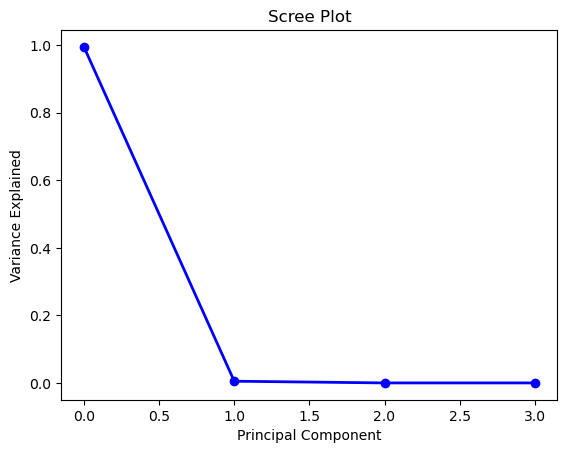

In [96]:
l, e = np.linalg.eig(Y_D)
plt.plot(range(len(l)), l / l.sum(), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

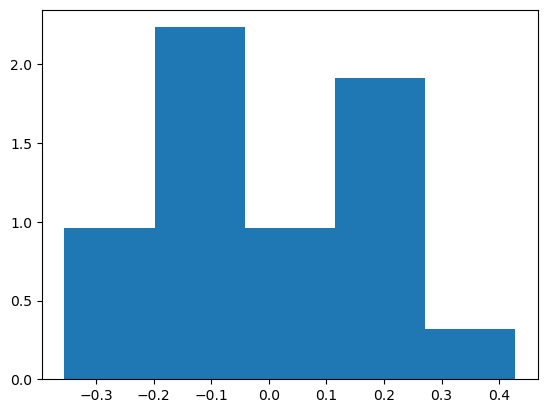

[-0.3550 -0.3342 -0.2431 -0.1745 -0.1459 -0.1213 -0.1001 -0.0999 -0.0761
 -0.0660 0.0003 0.0282 0.0559 0.1220 0.1876 0.1940 0.2068 0.2310 0.2623
 0.4279]


In [100]:
pc1 = np.matmul(Y - Y_m, e[0].T)
plt.hist(np.matmul(Y - Y_m, e[0]), bins=5, density=True)
plt.show()
print(np.sort(pc1))

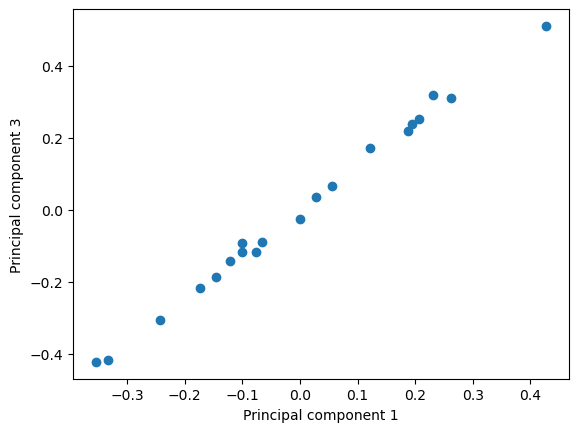

In [101]:
pc3 = np.matmul(Y - Y_m, e[2].T)
plt.scatter(pc1, pc3)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 3")
plt.show()

3. **Для второй выборки найти линейную комбинацию центрированных 2-ой, 3-ей, 4-ой компонент x(2), x(3), x(4), имеющую наибольший коэффициент корреляции с центрированной первой компонентой x(1).**

In [115]:
X_center = X - X_m
X_std = np.power(np.cov(X.T).diagonal(), 1/2)

X_norm = X_center / X_std
# np.cov(X_norm.T)


[1.3131 1.0541 0.8841 0.7623]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

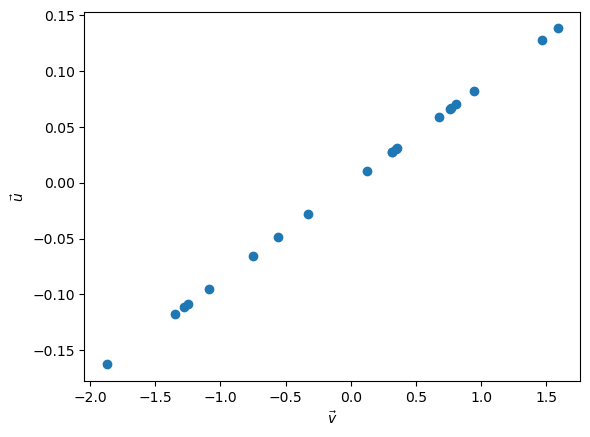

In [142]:
from sklearn.cross_decomposition import CCA
X_norm[ :,:1]
cca = CCA(n_components=1)
cca.fit(X_norm[ :,:1], X_norm[ :,1:])
X_c, Y_c = cca.transform(X_norm[ :,:1], X_norm[ :,1:])
display(mdVector("\\vec{\\lambda}", cca.x_rotations_.ravel()))
display(mdVector("\\vec{\\beta}", cca.y_rotations_.ravel()))
plt.scatter(X_c, Y_c)
plt.xlabel(r"$\vec{v}$")
plt.ylabel(r"$\vec{u}$")
plt.show()


4. **Объединить обе выборки в одну выборку, вставив вторую выборку под первой выборкой (x(1) под y(1) и т.д.). Получить выборку объема 40.**

In [147]:
G = np.vstack((Y, X))
pd.DataFrame(G, columns=['g(1)', 'g(2)', 'g(4)', 'g(4)'])

,f(1),f(2),f(4),f(4)
0,2.545700,3.144831,3.965829,4.881299
1,1.058471,2.116364,3.182012,4.249361
2,3.074954,3.781856,4.597693,5.479548
3,0.144693,1.319477,2.484649,3.632047
4,2.677750,3.428352,4.289612,5.209226
5,2.199170,2.939042,3.824908,4.776704
6,3.736851,4.277846,5.002494,5.824770
7,1.265428,2.325211,3.374433,4.423899
8,2.660614,3.388479,4.241173,5.158452
9,2.047672,2.895982,3.830462,4.806217


5. **Оценить параметры линейной регрессии $E\vec{\gamma} = B\vec{z} = B\begin{pmatrix} 1 \\ z \end{pmatrix}$, где $B$ – матрица нагрузок порядка (4х2).**